# Aufgabe 6
# a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def lcg(a,b,m,x):
    return (((a*x+b)%m))

In [3]:
def randGen(a,b,m,x0):
    i = 1
    x=x0
    u=x0/m
    list=[u]
    while(True):
        x = lcg(a,b,m,x)
        u = x/m
        if(u in list):
            break
        list.append(u)
        i +=1
    #print("Elemente in der Liste mit a=",a," : ",i)
    return i

In [4]:
x0 = 42
L=[]
for a in range(1024):
    L.append(randGen(a,3,1024,x0))

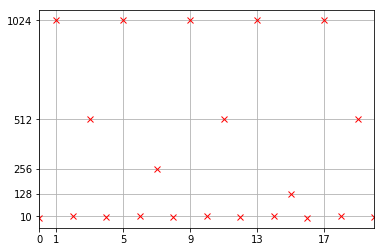

In [5]:
a=range(1024)
plt.plot(a,L,'rx')
plt.xlim(0,20)
plt.grid()
plt.yticks([10,128,256,512,1024])
plt.xticks([0,1,5,9,13,17])
plt.show()

Um eine maximale Periodenlänge zu erhalten müssen folgende Bedingungen gelten:

-$c \neq 0$

-$b$ und $m$ müssen teilerfremd sein

-$(a-1)$ muss durch die Primfaktoren von $m$ teilbar sein

-$(a-1)$ muss durch 4 teilbar sein, wenn $m$ durch 4 teilbar ist

Weil in diesem Fall $m=1024$ und $b=3$ vorliegen, ist schnell zu erkennen, dass diese teilerfremd sind.
Da $m=1024=2^{10}$ ist, ist 2 der einzige Primfaktor von $m$. Also muss $(a-1)$ durch 4 und 2 teilbar sein für eine maximale Periodenlänge.

Wie im Plot zu sehen sind die maximalen Ausschläge an den Punkten $a=1,5,9,13,17,...$.
Diese folgen genau den vorher gennanten Regeln.

# b)

In [6]:
def randGen2(a,b,m,x0):
    x=x0
    list=[x0/m]
    for y in range(10000):
        x = lcg(a,b,m,x)
        u = x/m
        list.append(u)
    return list

In [21]:
m = 10000
a = 1601
b = 3456

In [22]:
rnd_nums = randGen2(a,b,m,x0)
rnd_nums2 = randGen2(a,b,m,0)
rnd_nums3 = randGen2(a,b,m,113)
rnd_nums4 = randGen2(a,b,m,900)

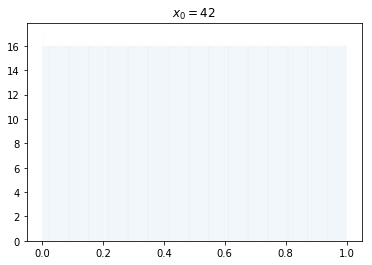

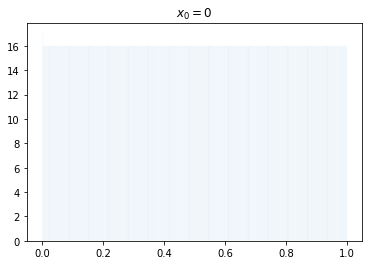

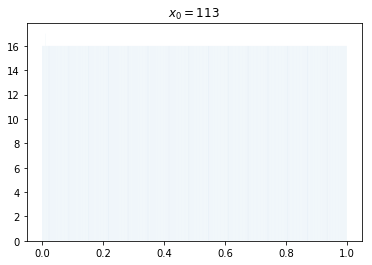

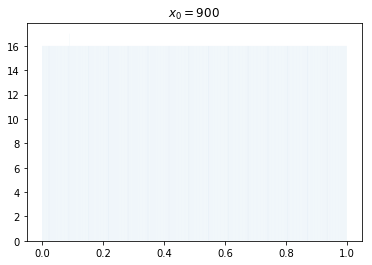

In [8]:
bin_l = len(rnd_nums)
plt.hist(rnd_nums,bins=bin_l, histtype='stepfilled')
plt.title(r'$x_0=42$')
plt.show()

bin_l2 = len(rnd_nums2)
plt.hist(rnd_nums2,bins=bin_l2, histtype='stepfilled')
plt.title(r'$x_0=0$')
plt.show()

bin_l3 = len(rnd_nums3)
plt.hist(rnd_nums3,bins=bin_l3, histtype='stepfilled')
plt.title(r'$x_0=113$')
plt.show()

bin_l4 = len(rnd_nums4)
plt.hist(rnd_nums4,bins=bin_l4, histtype='stepfilled')
plt.title(r'$x_0=900$')
plt.show()

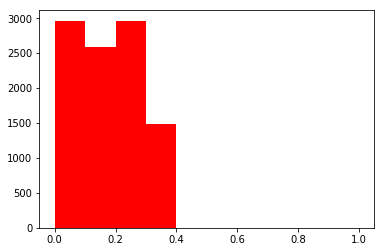

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [23]:
from scipy import stats
pValues = []
for x_i in range(0,10000,1000):
    histArray = [x_i/m]
    for i in range(10000):
        x_i = lcg(x_i,a,b,m)
        histArray.append(x_i/m)
    binnedData = np.histogram(histArray, bins=10, range=(0,1))[0]
    pValue = stats.chisquare(binnedData)[1]
    #print(pValue)
    pValues.append(pValue)
plt.hist(histArray,bins=10,range=(0,1),color='r')
plt.show()
print(pValues)

Es ist klar zu sehen, dass die Verteilung unabhängig vom Startwert ist.
Es werden alle.

# c)

In [24]:
print(len(rnd_nums))
rnd_nums_1 = np.zeros(5000)
rnd_nums_2 = np.zeros(5000)
x = 0
y = 0
while x in range(10000) and y in range(10000):
    rnd_nums_1[y] = rnd_nums[x]
    rnd_nums_2[y] = rnd_nums[x+1]
    x += 2
    y += 1

10001


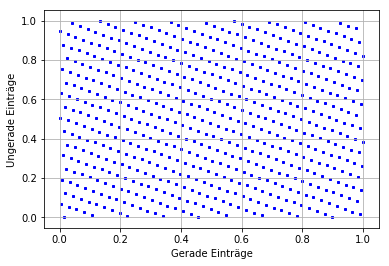

In [25]:
plt.scatter(rnd_nums_1,rnd_nums_2,color='b' ,s=2)
plt.xlabel('Gerade Einträge')
plt.ylabel('Ungerade Einträge')
plt.grid()
plt.show()

In [26]:
rnd_nums_3 = np.zeros(3333)
rnd_nums_4 = np.zeros(3333)
rnd_nums_5 = np.zeros(3333)
x = 0
y = 0
while x in range(3333) and y in range(3333):
    rnd_nums_3[y] = rnd_nums[x]
    rnd_nums_4[y] = rnd_nums[x+1]
    rnd_nums_5[y] = rnd_nums[x+2]
    x += 3
    y += 1

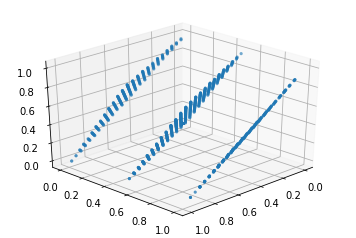

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(rnd_nums_3,rnd_nums_4,rnd_nums_5, lw=0, s=10)
ax.view_init(30,45)
plt.show()

In den Scatter-Plos ist deutlich zu sehen, dass die Werte an diskreten Stellen gehäuft vorkommen. Somit gibt es auch viele nicht gefüllte Lücken. Somit ist es nur möglich eine begrenzte Anzahl an Zufallszahlen zu erhalten, bevor sich nach einer Periodenlänge die Zahlen wiederholen. Auch liegen die Wertepaare auf parallelen Geraden und im 3D-Plot auf Ebenen. Somit ist das Verhältnis zwischen den Paaren auf diesen Linien gleich.

# d)

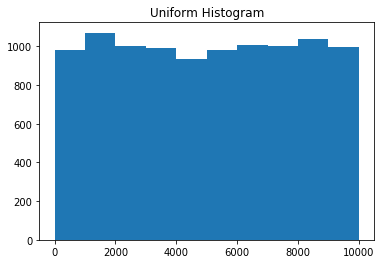

In [28]:
x_u = np.random.uniform(0,10000,10000)
bin_len = len(x_u)
plt.hist(x_u, histtype ='stepfilled')
plt.title('Uniform Histogram')
plt.show()

In [29]:
x_u1 = np.zeros(5000)
x_u2 = np.zeros(5000)

x = 0
y = 0
while x in range(5000) and y in range(5000):
    x_u1[y] = x_u[x]
    x_u2[y] = x_u[x+1]
    x += 2
    y += 1

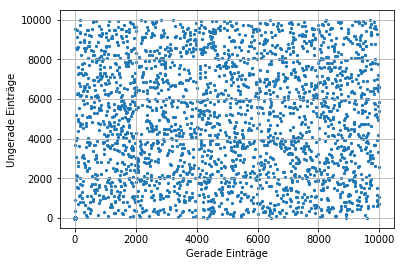

In [30]:
plt.scatter(x_u1,x_u2, s=5)
plt.xlabel('Gerade Einträge')
plt.ylabel('Ungerade Einträge')
plt.grid()
plt.show()

In [31]:
x_u3 = np.zeros(3333)
x_u4 = np.zeros(3333)
x_u5 = np.zeros(3333)
x = 0
y = 0
while x in range(3333) and y in range(3333):
    x_u3[y] = x_u[x]
    x_u4[y] = x_u[x+1]
    x_u5[y] = x_u[x+2]
    x += 3
    y += 1

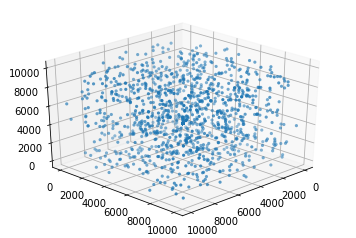

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(x_u3,x_u4,x_u5, lw=0, s=10)
ax.view_init(30,45)
plt.show()

# e)

In [33]:
def randGen3(a,b,m,x0):
    i = 1
    x=x0
    u=x0/m
    list=[u]
    while(True):
        x = lcg(a,b,m,x)
        u = x/m
        if(u in list):
            break
        list.append(u)
        i +=1
    return list

In [34]:
L2=[]
for a in range(1024):
    L2.append(randGen3(a,3,1024,x0))

In [35]:
A=[]
for a in range(1024):
        if 0.5 in L2[a]:
            A.append(a)
print("0.5 in L2 mit folgenden a:")
print(A)
for x in range(len(A)): #Überprüfung ob alle Einträge den Regeln für max Perioden gehorchen
    A[x] = (A[x]-1)%4
print(A)

0.5 in L2 mit folgenden a:
[1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73, 77, 81, 85, 89, 93, 97, 101, 105, 109, 113, 117, 121, 125, 129, 133, 137, 141, 145, 149, 153, 157, 161, 165, 169, 173, 177, 181, 185, 189, 193, 197, 201, 205, 209, 213, 217, 221, 225, 229, 233, 237, 241, 245, 249, 253, 257, 261, 265, 269, 273, 277, 281, 285, 289, 293, 297, 301, 305, 309, 313, 317, 321, 325, 329, 333, 337, 341, 345, 349, 353, 357, 361, 365, 369, 373, 377, 381, 385, 389, 393, 397, 401, 405, 409, 413, 417, 421, 425, 429, 433, 437, 441, 445, 449, 453, 457, 461, 465, 469, 473, 477, 481, 485, 489, 493, 497, 501, 505, 509, 513, 517, 521, 525, 529, 533, 537, 541, 545, 549, 553, 557, 561, 565, 569, 573, 577, 581, 585, 589, 593, 597, 601, 605, 609, 613, 617, 621, 625, 629, 633, 637, 641, 645, 649, 653, 657, 661, 665, 669, 673, 677, 681, 685, 689, 693, 697, 701, 705, 709, 713, 717, 721, 725, 729, 733, 737, 741, 745, 749, 753, 757, 761, 765, 769, 773, 777, 781, 785, 789, 793, 797, 

Das sind die "$a$'s" mit denen eine maximale Periodenlänge erreicht werden konnte, aufgrund der oben im Abschnitt a) genannten Regeln.

Mögliche Startwerte um $\frac{1}{2}$ zu erhalten müssen folgende Bedingung erfüllen:


\begin{equation}
\frac{(ax_0+b)\% m}{m}=0.5 \\
(ax_0+b)\%m = 0.5 \cdot m \\
(ax_0+b) = 0.5 \cdot m \\
x_0 = \frac{0.5 \cdot m -b}{a}
\end{equation}
Weil $m$ und $b$ fest gewählt sind, hängt unser Startwert von $a$ ab.

Für $a=1$ wäre der Startwert bei $m=1024$ und $b=3$, $x_0 = 509$ bei dem $\frac{1}{2}$ garantiert vorkommt.

Es gibt keinen Startwert bei dem für alle "$a$'s" $\frac{1}{2}$ vorkommt, weil $x_0$ von $a$ abhängt.

In [37]:
#L3=[]
#A2=[]
#for x_0 in range(10):
#    for a in range(1024):
#        L3.append(randGen3(a,3,1024,x_0))
#        if 0.5 in L3[a]:
#            A.append(a%4)
#print(A)